# Dear Breno and Burak

This is the code that will answer the question on the assignment. There is a particular flaw that I could not solve and I would like to tell you how to overcome this if you are running this code:

In a part in this code I load the table files, locally stored, in the SQL server. If at some point the code does not run, please load again the cell where LINEITEM is, and the ones under it. I hope this can let you see the results fully.

I used mysql.connector and Pandas to analyze the information and matplotlib. On an other, I will upload the code in a .zip since all the tables and images are locally stored, you could extract everything locally and run it through Jupyter.

Additionally, in order to access the Database server I have to put my SQL credentials, just change the password (under pw, some cells below) to yours and should be fine.

Finally, I really enjoyed making this code. Hope to hear back from you and kind regards.

Julio

# Connection to mysql

In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

## Function that will connect the mysql server

In [2]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            allow_local_infile=True
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

## Connection to server using my credentials

In [3]:
pw='julio'#please change the password to the users password
connection = create_server_connection("localhost", "root", pw)

MySQL Database connection successful


In [4]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

## Creation of database called Beerwulf

In [5]:
create_database_query = 'CREATE DATABASE BEERWULF'
execute_query(connection,create_database_query)

Error: '1007 (HY000): Can't create database 'beerwulf'; database exists'


In [6]:
create_database_query = 'USE BEERWULF'
execute_query(connection,create_database_query)

Query successful


## Before continuing with the task, I will add revenue to the lineitem table using the formula:

Revenue = Extended price - discount - tax; since I assumed that the extended price comes as a calculation made from this columns.

In [7]:
import pandas as pd

### File is read, and I add revenue and an ID columns to this table. (Answer to question 2)

In [8]:
l_df0 = pd.read_table('lineitem.tbl',delimiter='|',header=None,names=['order','part','suppkey','linenumber','quantity','extendedprice','discount','tax','returnflag','linestatus','shipdate','commit','receipt','instruct','shipmode','comment','revenue','ID'])
l_df0

order  part  suppkey  linenumber  quantity  extendedprice  discount  \
0          1  1552       93           1        17       24710.35      0.04   
1          1   674       75           2        36       56688.12      0.09   
2          1   637       38           3         8       12301.04      0.10   
3          1    22       48           4        28       25816.56      0.09   
4          1   241       23           5        24       27389.76      0.10   
...      ...   ...      ...         ...       ...            ...       ...   
60170  60000  1843       44           2        23       40131.32      0.05   
60171  60000  1057       63           3        45       43112.25      0.02   
60172  60000   271       53           4        29       33966.83      0.02   
60173  60000   585       16           5        31       46052.98      0.00   
60174  60000   836        3           6        45       78157.35      0.04   

        tax returnflag linestatus    shipdate      commit     receipt  \
0      0.02          N          O  1996-03-13  1996-02-12  1996-03-22   
1      0.06          N          O  1996-04-12  1996-02-28  1996-04-20   
2      0.02          N          O  1996-01-29  1996-03-05  1996-01-31   
3      0.06          N          O  1996-04-21  1996-03-30  1996-05-16   
4      0.04          N          O  1996-03-30  1996-03-14  1996-04-01   
...     ...        ...        ...         ...         ...         ...   
60170  0.03          N          O  1995-08-09  1995-06-08  1995-08-23   
60171  0.02          R          F  1995-05-15  1995-05-31  1995-06-03   
60172  0.01          N          O  1995-07-25  1995-06-07  1995-08-17   
60173  0.05          N          O  1995-08-06  1995-07-18  1995-08-19   
60174  0.08          N          O  1995-07-23  1995-07-17  1995-07-24   

                instruct shipmode                                comment  \
0      DELIVER IN PERSON    TRUCK                egular courts above the   
1       TAKE BACK RETURN     MAIL     ly final dependencies: slyly bold    
2       TAKE BACK RETURN  REG AIR          riously. regular, express dep   
3                   NONE      AIR                lites. fluffily even de   
4                   NONE      FOB                pending foxes. slyly re   
...                  ...      ...                                    ...   
60170        COLLECT COD      FOB             ideas about the permanent    
60171        COLLECT COD     SHIP       fully bold pinto beans alongside   
60172        COLLECT COD     SHIP                 ly final ideas boost s   
60173   TAKE BACK RETURN    TRUCK                          ly even instr   
60174  DELIVER IN PERSON    TRUCK  ke final packages. carefully final fo   

       revenue  ID  
0          NaN NaN  
1          NaN NaN  
2          NaN NaN  
3          NaN NaN  
4          NaN NaN  
...        ...  ..  
60170      NaN NaN  
60171      NaN NaN  
60172      NaN NaN  
60173      NaN NaN  
60174      NaN NaN  

[60175 rows x 18 columns]

### Calculation of revenue

In [9]:
l_df0['revenue']=l_df0['extendedprice']+l_df0['discount']+l_df0['tax']

### A unique idex just in case.

In [10]:
l_df0['ID'] = [i+1 for i in range(l_df0.index.size)]

### Loading of the table as a table file, using new name and keep the original.

In [11]:
l_df0.to_csv('lineitem2.tbl', header=None, index=None, sep='|', line_terminator='|\n')

### Read the table again just to make sure that the infromation was correctly saved. The columns migth not match with the intended data, but luckily for SQL this is irrelevant at this moment.

In [12]:
l_df = pd.read_table('lineitem2.tbl',delimiter='|',header=None,names=['order','part','suppkey','linenumber','quantity','extendedprice','discount','tax','returnflag','linestatus','shipdate','commit','receipt','instruct','shipmode','comment','revenue'])
l_df

order  part  suppkey  linenumber  quantity  extendedprice  \
1     1552     93     1       17    24710.35      0.04           0.02   
      674      75     2       36    56688.12      0.09           0.06   
      637      38     3        8    12301.04      0.10           0.02   
      22       48     4       28    25816.56      0.09           0.06   
      241      23     5       24    27389.76      0.10           0.04   
...           ...   ...      ...         ...       ...            ...   
60000 1843     44     2       23    40131.32      0.05           0.03   
      1057     63     3       45    43112.25      0.02           0.02   
      271      53     4       29    33966.83      0.02           0.01   
      585      16     5       31    46052.98      0.00           0.05   
      836       3     6       45    78157.35      0.04           0.08   

           discount tax  returnflag  linestatus    shipdate  \
1     1552        N   O  1996-03-13  1996-02-12  1996-03-22   
      674         N   O  1996-04-12  1996-02-28  1996-04-20   
      637         N   O  1996-01-29  1996-03-05  1996-01-31   
      22          N   O  1996-04-21  1996-03-30  1996-05-16   
      241         N   O  1996-03-30  1996-03-14  1996-04-01   
...             ...  ..         ...         ...         ...   
60000 1843        N   O  1995-08-09  1995-06-08  1995-08-23   
      1057        R   F  1995-05-15  1995-05-31  1995-06-03   
      271         N   O  1995-07-25  1995-06-07  1995-08-17   
      585         N   O  1995-08-06  1995-07-18  1995-08-19   
      836         N   O  1995-07-23  1995-07-17  1995-07-24   

                       commit  receipt                               instruct  \
1     1552  DELIVER IN PERSON    TRUCK                egular courts above the   
      674    TAKE BACK RETURN     MAIL     ly final dependencies: slyly bold    
      637    TAKE BACK RETURN  REG AIR          riously. regular, express dep   
      22                 NONE      AIR                lites. fluffily even de   
      241                NONE      FOB                pending foxes. slyly re   
...                       ...      ...                                    ...   
60000 1843        COLLECT COD      FOB             ideas about the permanent    
      1057        COLLECT COD     SHIP       fully bold pinto beans alongside   
      271         COLLECT COD     SHIP                 ly final ideas boost s   
      585    TAKE BACK RETURN    TRUCK                          ly even instr   
      836   DELIVER IN PERSON    TRUCK  ke final packages. carefully final fo   

            shipmode  comment  revenue  
1     1552  24710.41        1      NaN  
      674   56688.27        2      NaN  
      637   12301.16        3      NaN  
      22    25816.71        4      NaN  
      241   27389.90        5      NaN  
...              ...      ...      ...  
60000 1843  40131.40    60171      NaN  
      1057  43112.29    60172      NaN  
      271   33966.86    60173      NaN  
      585   46053.03    60174      NaN  
      836   78157.47    60175      NaN  

[60175 rows x 17 columns]

# Task classify client's account balance

## Read table file and add valuable headers to the dataframe

In [13]:
c_df0 = pd.read_table('customer.tbl',delimiter='|',header=None,names=['custindex','custkey','name','c','d','balance','f','g','class'])

## Classification balance

This function sorts the balance of the clients and classifies them in 3 groups:
- Top 20: Of all the clients with a positive balance, these are the 20% who has the largest amount.
- Not top 20%, but some debt: These are the rest of the mentioned above, they still have a debt to the company but not as high as the group above.
- Negative balance: These selected group have a negative balance in their accounts with the company.

In [14]:
def debt_class(c_df):
    
    c_df=c_df.sort_values(by=['balance'],ascending=False)#reads the table of customers
    clas = ['top 20% debt','current debt','positive balance','not a number in balance']#categories
    
    
    dim = range(0,c_df.index.size)#size where the for will make a loop
    neg_range = []#range of the positive numbers in the balance
    
    for i in dim:
        try:#this is in case a non float is read, the prgram tells the user there is something suspicious here
            val = c_df['balance'].iloc[i]#value to evaluate
            if val<0:#if negative the code labels these client in the column 'class'
                c_df['class'].iloc[i]=clas[2]
            else:#if positive the code labels these
                neg_range.append(i)
                c_df['class'].iloc[i]=clas[1]
        except ValueError:
            c_df['class'].iloc[i]=clas[3]

    top20=round(len(neg_range)*0.2,0)#size of the ones with positive balance
    top20_range = range(0,int(top20))#size of the top20%
    
    for i in top20_range:c_df['class'].iloc[i]=clas[0]#classification of the top 20% classes
    
    return(c_df.sort_index())#return back the modified dataframe using the original indexing

## Validation that the operations where made

In [15]:
c_df=debt_class(c_df0)
c_df

c:\users\julio\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


custindex             custkey                                     name  \
0             1  Customer#000000001                        IVhzIApeRb ot,c,E   
1             2  Customer#000000002           XSTf4,NCwDVaWNe6tEgvwfmRchLXak   
2             3  Customer#000000003                             MG9kdTD2WBHm   
3             4  Customer#000000004                              XxVSJsLAGtn   
4             5  Customer#000000005             KvpyuHCplrB84WgAiGV6sYpZq7Tj   
...         ...                 ...                                      ...   
1495       1496  Customer#000001496                             ZOyMxutVHpJy   
1496       1497  Customer#000001497                    D8e2U3gYd57H4grcOr,02   
1497       1498  Customer#000001498  x XToT5oFi7oIsRG2mgIL3ncvYJoWBsufsQ7N,z   
1498       1499  Customer#000001499       4,6jWOEqfnuXkwhB7gs0M9TcWJlaJNv4bt   
1499       1500  Customer#000001500                     4zaoUzuWUTNFiNPbmu43   

       c                d  balance           f  \
0     15  25-989-741-2988   711.56    BUILDING   
1     13  23-768-687-3665   121.65  AUTOMOBILE   
2      1  11-719-748-3364  7498.12  AUTOMOBILE   
3      4  14-128-190-5944  2866.83   MACHINERY   
4      3  13-750-942-6364   794.47   HOUSEHOLD   
...   ..              ...      ...         ...   
1495   3  13-802-978-9538  -496.49  AUTOMOBILE   
1496  14  24-506-574-8552  2449.57  AUTOMOBILE   
1497  19  29-676-227-6356  5810.56  AUTOMOBILE   
1498   3  13-273-527-9609  9128.69  AUTOMOBILE   
1499   5  15-200-872-4790  6910.79   MACHINERY   

                                                      g             class  
0     to the even, regular platelets. regular, ironi...      current debt  
1     l accounts. blithely ironic theodolites integr...      current debt  
2      deposits eat slyly ironic, even instructions....      current debt  
3      requests. final, regular ideas sleep final accou      current debt  
4     n accounts will have to unwind. foxes cajole a...      current debt  
...                                                 ...               ...  
1495              counts wake slyly above the instructi  positive balance  
1496  gular packages boost foxes. blithely bold esca...      current debt  
1497                      ackages are slyly unusual req      current debt  
1498  ole blithely permanent instructions. carefully...      top 20% debt  
1499  s boost blithely above the fluffily ironic dol...      current debt  

[1500 rows x 9 columns]

## Add a bar chart to see the information (Answer to question 2)

In [16]:
clas = ['top 20% debt','current debt','positive balance']

bar1=sum(c_df['balance'][c_df['class']==clas[0]])
bar2=sum(c_df['balance'][c_df['class']==clas[1]])
bar3=sum(c_df['balance'][c_df['class']==clas[2]])

bars = [round(bar1,2),round(bar2,2),round(bar3,2)]

pos = [1,3,5]

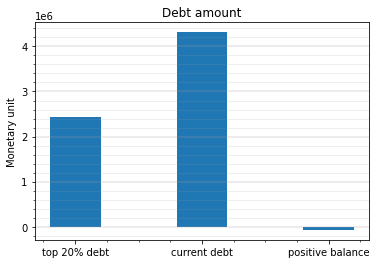

[2438817.05, 4314693.49, -71644.95]


In [17]:
import matplotlib.pyplot as plt


plt.bar(pos,bars, label=clas)
plt.ylabel('Monetary unit')
plt.title('Debt amount')
plt.xticks(pos,clas)
plt.grid(b=True, which='major', axis = 'y' , color='#A79E9E', linestyle='-', linewidth=0.4)
plt.minorticks_on()
plt.grid(b=True, which='minor', axis = 'y' , color='#999999', linestyle='-', alpha=0.2)
plt.show()
print(bars)

## Store of data back in the location of files to the next task

In [18]:
c_df.to_csv('customer2.tbl', header=None, index=None, sep='|', line_terminator='|\n')

## Quick verification that the data saved is the same as the one modified here

In [19]:
c_df_ver = pd.read_table('customer2.tbl',delimiter='|',header=None,names=['custkey','name','b','c','d','balance','f','g','class'])
c_df_ver

custkey                                     name   b  \
1     Customer#000000001                        IVhzIApeRb ot,c,E  15   
2     Customer#000000002           XSTf4,NCwDVaWNe6tEgvwfmRchLXak  13   
3     Customer#000000003                             MG9kdTD2WBHm   1   
4     Customer#000000004                              XxVSJsLAGtn   4   
5     Customer#000000005             KvpyuHCplrB84WgAiGV6sYpZq7Tj   3   
...                  ...                                      ...  ..   
1496  Customer#000001496                             ZOyMxutVHpJy   3   
1497  Customer#000001497                    D8e2U3gYd57H4grcOr,02  14   
1498  Customer#000001498  x XToT5oFi7oIsRG2mgIL3ncvYJoWBsufsQ7N,z  19   
1499  Customer#000001499       4,6jWOEqfnuXkwhB7gs0M9TcWJlaJNv4bt   3   
1500  Customer#000001500                     4zaoUzuWUTNFiNPbmu43   5   

                    c        d     balance  \
1     25-989-741-2988   711.56    BUILDING   
2     23-768-687-3665   121.65  AUTOMOBILE   
3     11-719-748-3364  7498.12  AUTOMOBILE   
4     14-128-190-5944  2866.83   MACHINERY   
5     13-750-942-6364   794.47   HOUSEHOLD   
...               ...      ...         ...   
1496  13-802-978-9538  -496.49  AUTOMOBILE   
1497  24-506-574-8552  2449.57  AUTOMOBILE   
1498  29-676-227-6356  5810.56  AUTOMOBILE   
1499  13-273-527-9609  9128.69  AUTOMOBILE   
1500  15-200-872-4790  6910.79   MACHINERY   

                                                      f                 g  \
1     to the even, regular platelets. regular, ironi...      current debt   
2     l accounts. blithely ironic theodolites integr...      current debt   
3      deposits eat slyly ironic, even instructions....      current debt   
4      requests. final, regular ideas sleep final accou      current debt   
5     n accounts will have to unwind. foxes cajole a...      current debt   
...                                                 ...               ...   
1496              counts wake slyly above the instructi  positive balance   
1497  gular packages boost foxes. blithely bold esca...      current debt   
1498                      ackages are slyly unusual req      current debt   
1499  ole blithely permanent instructions. carefully...      top 20% debt   
1500  s boost blithely above the fluffily ironic dol...      current debt   

      class  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
...     ...  
1496    NaN  
1497    NaN  
1498    NaN  
1499    NaN  
1500    NaN  

[1500 rows x 9 columns]

# Back to the mysql, I build the needed database and load information in the tables

In [20]:
use_query = 'USE BEERWULF'
execute_query(connection,create_database_query)

Query successful


## Under the connection with mysql server, the tables are created as follow

### Create Region

In [21]:
create_table="""CREATE TABLE REGION (
  R_REGIONKEY INTEGER PRIMARY KEY NOT NULL,
  R_NAME      TEXT NOT NULL,
  R_COMMENT   TEXT
);
"""
execute_query(connection,create_table)

Query successful


### Create Part

In [22]:
create_table="""CREATE TABLE PART (
  P_PARTKEY     INTEGER PRIMARY KEY NOT NULL,
  P_NAME        TEXT NOT NULL,
  P_MFGR        TEXT NOT NULL,
  P_BRAND       TEXT NOT NULL,
  P_TYPE        TEXT NOT NULL,
  P_SIZE        INTEGER NOT NULL,
  P_CONTAINER   TEXT NOT NULL,
  P_RETAILPRICE INTEGER NOT NULL,
  P_COMMENT     TEXT NOT NULL
);"""
execute_query(connection,create_table)

Query successful


### Create Nation

In [23]:
create_table="""CREATE TABLE NATION (
  N_NATIONKEY INTEGER PRIMARY KEY NOT NULL,
  N_NAME      TEXT NOT NULL,
  N_REGIONKEY INTEGER NOT NULL,
  N_COMMENT   TEXT,
  FOREIGN KEY (N_REGIONKEY) REFERENCES REGION(R_REGIONKEY)
);"""
execute_query(connection,create_table)

Query successful


### Create Supplier

In [24]:
create_table="""CREATE TABLE SUPPLIER (
  S_SUPPKEY   INTEGER PRIMARY KEY NOT NULL,
  S_NAME      TEXT NOT NULL,
  S_ADDRESS   TEXT NOT NULL,
  S_NATIONKEY INTEGER NOT NULL,
  S_PHONE     TEXT NOT NULL,
  S_ACCTBAL   INTEGER NOT NULL,
  S_COMMENT   TEXT NOT NULL,
  FOREIGN KEY (S_NATIONKEY) REFERENCES NATION(N_NATIONKEY)
);
"""
execute_query(connection,create_table)


Query successful


### Create PartSupp

In [25]:
create_table="""CREATE TABLE PARTSUPP (
  PS_PARTKEY    INTEGER NOT NULL,
  PS_SUPPKEY    INTEGER NOT NULL,
  PS_AVAILQTY   INTEGER NOT NULL,
  PS_SUPPLYCOST INTEGER NOT NULL,
  PS_COMMENT    TEXT NOT NULL,
  PRIMARY KEY (PS_PARTKEY, PS_SUPPKEY),
  FOREIGN KEY (PS_SUPPKEY) REFERENCES SUPPLIER(S_SUPPKEY),
  FOREIGN KEY (PS_PARTKEY) REFERENCES PART(P_PARTKEY)
);"""
execute_query(connection,create_table)

Query successful


### Create Customer

In [26]:
create_table="""
CREATE TABLE CUSTOMER (
  C_CUSTKEY    INTEGER PRIMARY KEY NOT NULL,
  C_NAME       TEXT NOT NULL,
  C_ADDRESS    TEXT NOT NULL,
  C_NATIONKEY  INTEGER NOT NULL,
  C_PHONE      TEXT NOT NULL,
  C_ACCTBAL    INTEGER   NOT NULL,
  C_MKTSEGMENT TEXT NOT NULL,
  C_COMMENT    TEXT NOT NULL,
  C_CLASSJ     TEXT NOT NULL,
  FOREIGN KEY (C_NATIONKEY) REFERENCES NATION(N_NATIONKEY)
);"""
execute_query(connection,create_table)

Query successful


### Create Orders

In [27]:
create_table="""
CREATE TABLE ORDERS (
  O_ORDERKEY      INTEGER PRIMARY KEY NOT NULL,
  O_CUSTKEY       INTEGER NOT NULL,
  O_ORDERSTATUS   TEXT NOT NULL,
  O_TOTALPRICE    INTEGER NOT NULL,
  O_ORDERDATE     DATE NOT NULL,
  O_ORDERPRIORITY TEXT NOT NULL,  
  O_CLERK         TEXT NOT NULL, 
  O_SHIPPRIORITY  INTEGER NOT NULL,
  O_COMMENT       TEXT NOT NULL,
  FOREIGN KEY (O_CUSTKEY) REFERENCES CUSTOMER(C_CUSTKEY)
);"""
execute_query(connection,create_table)

Query successful


### Create Lineitem

In [28]:
create_table="""
CREATE TABLE LINEITEM (
  L_ORDERKEY      INTEGER NOT NULL,
  L_PARTKEY       INTEGER NOT NULL,
  L_SUPPKEY       INTEGER NOT NULL,
  L_LINENUMBER    INTEGER NOT NULL,
  L_QUANTITY      INTEGER NOT NULL,
  L_EXTENDEDPRICE INTEGER NOT NULL,
  L_DISCOUNT      INTEGER NOT NULL,
  L_TAX           INTEGER NOT NULL,
  L_RETURNFLAG    TEXT NOT NULL,
  L_LINESTATUS    TEXT NOT NULL,
  L_SHIPDATE      DATE NOT NULL,
  L_COMMITDATE    DATE NOT NULL,
  L_RECEIPTDATE   DATE NOT NULL,
  L_SHIPINSTRUCT  TEXT NOT NULL,
  L_SHIPMODE      TEXT NOT NULL,
  L_COMMENT       TEXT NOT NULL,
  L_REVENUEITEM   INTEGER NOT NULL,
  L_ID            INTEGER NOT NULL,
  PRIMARY KEY (L_ORDERKEY, L_LINENUMBER,L_ID),
  FOREIGN KEY (L_ORDERKEY) REFERENCES ORDERS(O_ORDERKEY),
  FOREIGN KEY (L_PARTKEY, L_SUPPKEY) REFERENCES PARTSUPP(PS_PARTKEY, PS_SUPPKEY)
);"""
execute_query(connection,create_table)

Query successful


## Load information from tables

In this part I am loading the tables to the database created, particularly for the case of Lineitem and Partsupp tables, one has to execute this code line, I could not see the reason but I assume that this is due to the size of Lineitem.

So please, if the reader is trying to execute this, I encourage to reload Lineitem and Partsupp cell code couple times. 

### Use DataBase

In [56]:
use_db="USE BEERWULF"
execute_query(connection,use_db)

Query successful


### Load Region

In [57]:
load_table="""
LOAD DATA LOCAL INFILE 'region.tbl' 
INTO TABLE region
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


### Load Nation

In [58]:
load_table="""
LOAD DATA LOCAL INFILE 'nation.tbl' 
INTO TABLE nation
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


### Load Supplier

In [59]:
load_table="""
LOAD DATA LOCAL INFILE 'supplier.tbl' 
INTO TABLE supplier
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


### Load Customer

In [60]:
load_table="""
LOAD DATA LOCAL INFILE 'customer2.tbl' 
INTO TABLE customer
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


### Load Orders

In [61]:
load_table="""
LOAD DATA LOCAL INFILE 'orders.tbl' 
INTO TABLE orders
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


### Load PartSupp

In [62]:
load_table="""
LOAD DATA LOCAL INFILE 'partsupp.tbl' 
INTO TABLE partsupp
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


### Load Lineitem

In [63]:
load_table="""
LOAD DATA LOCAL INFILE 'lineitem2.tbl' 
INTO TABLE lineitem
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


### Load Part

In [64]:
load_table="""
LOAD DATA LOCAL INFILE 'part.tbl' 
INTO TABLE part
FIELDS TERMINATED BY '|'
LINES TERMINATED BY '\n';
"""
execute_query(connection,load_table)

Query successful


## Once all the data is loaded, I will try to retrieve all the neccesary data that migth allow me to answer the assignment's questions.

### Connection to server and the database called Beerwulf

In [65]:
pw='julio'
connection = create_server_connection("localhost", "root", pw)
use_query = 'USE BEERWULF'
execute_query(connection,use_query)

MySQL Database connection successful
Query successful


### These function will allow me to execute SQL codes and retrieve information from the databases

In [66]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

### Top costumer in terms of both quantity and revenue

In [67]:
q1 = """
SELECT LINEITEM.L_ORDERKEY, LINEITEM.L_LINENUMBER, LINEITEM.L_REVENUEITEM,LINEITEM.L_QUANTITY, ORDERS.O_CUSTKEY, CUSTOMER.C_NAME
FROM LINEITEM
INNER JOIN ORDERS ON ORDERS.O_ORDERKEY = LINEITEM.L_ORDERKEY
INNER JOIN CUSTOMER ON ORDERS.O_CUSTKEY = CUSTOMER.C_CUSTKEY
ORDER BY LINEITEM.L_REVENUEITEM ASC;"""

db = 'beerwulf'

def top_customer(q1,pw,db,concept):

    connection = create_db_connection("localhost", "root", pw, db)#connection to database
    results = read_query(connection, q1)#results stored in this variable

    from_db = []#empty list to store one line of results

    for result in results:
      result = list(result)
      from_db.append(result)#storage of all the lines from the empty list


    columns = ["order", "linenumber", "revenue","quantity","customerkey", "customername"]#columns in the dataframe
    df = pd.DataFrame(from_db, columns=columns)#dataframe of the list with the results from the SQL's query

    columns1 = ["customer",concept]#concept to analyze
    aux = []#auxiliar variable
    
    for i in df['customername'].unique():#total of revenue/quantity of everyclient is stored in the next datframe
        j = df.loc[df['customername'] == i, concept].sum()
        aux.append([i,j])

    dfaux=pd.DataFrame(aux,columns=columns1)#this dataframe has every client, with its sum of revenue/quantity 
    
    return dfaux[dfaux[concept]==dfaux[concept].max()]#returns the client with max revenue/quantity

### Top customer in terms of revenue (Answer to 5.d)

In [68]:
concept = 'revenue'
top_customer(q1,pw,db,concept)

MySQL Database connection successful


customer  revenue
633  Customer#000001489  5457282

### Top customer in terms of quantity (Answer to 5.d)

In [69]:
concept = 'quantity'
top_customer(q1,pw,db,concept)

MySQL Database connection successful


customer  quantity
633  Customer#000001489      3868

## Top and bottom nations in terms of revenue

In [70]:
q2 = """
SELECT LINEITEM.L_ORDERKEY, LINEITEM.L_LINENUMBER, LINEITEM.L_REVENUEITEM, LINEITEM.L_SHIPMODE, ORDERS.O_CUSTKEY, CUSTOMER.C_NATIONKEY, NATION.N_NAME
FROM LINEITEM
INNER JOIN ORDERS ON ORDERS.O_ORDERKEY = LINEITEM.L_ORDERKEY
INNER JOIN CUSTOMER ON ORDERS.O_CUSTKEY = CUSTOMER.C_CUSTKEY
INNER JOIN NATION ON CUSTOMER.C_NATIONKEY = NATION.N_NATIONKEY
ORDER BY LINEITEM.L_REVENUEITEM ASC;"""

db = 'beerwulf'



def top_bottom(pw,db,q2):

    connection = create_db_connection("localhost", "root", pw, db)#connection to database
    results = read_query(connection, q2)#results stored in this variable

    from_db = []#empty list to store one line of results

    for result in results:
      result = list(result)
      from_db.append(result)#storage of all the lines from the empty list


    columns = ["order", "linenumber", "revenue","shipmode","customerkey", "nationkey","nationname"]#columns in the dataframe
    df2 = pd.DataFrame(from_db, columns=columns)#dataframe of the list with the results

    columns1 = ['nationname','revenue']#concept to analyze
    aux = []#auxiliar variable

    for i in df2['nationname'].unique():#total of revenue/quantity of everyclient is stored in the next datframe
        j = df2.loc[df2['nationname'] == i, 'revenue'].sum()
        aux.append([i,j])

    dfaux1=pd.DataFrame(aux,columns=columns1)#this dataframe has every client, with its sum of revenue/quantity 

    bottom_nations = dfaux1.sort_values(by='revenue')[0:3]#bottom 3 nations sorted by revenue
    top_nations = dfaux1.sort_values(by='revenue',ascending=False)[0:3]#top 3 nations sorted by revenue
    
    return df2,bottom_nations,top_nations

### Bottom, top and dataframe from the database

In [71]:
df2,bottom_nations,top_nations = top_bottom(pw,db,q2)

MySQL Database connection successful


### Names of top and bottom nations

In [72]:
bottom_names=bottom_nations['nationname']
top_names=top_nations['nationname']

### Bottom nations (Answer to 5.a)

In [73]:
bottom_nations

nationname   revenue
24         FRANCE  54431802
7           CHINA  65868743
21  UNITED STATES  65951430

### Top Nations (Answer to 5.b)

In [74]:
top_nations

nationname    revenue
0      CANADA  110895322
11      EGYPT  107539560
9        IRAN  105586147

### Top ship mode

In [75]:
def top_shipmode(df2,country):

    c_list = []
    for c in country:
        value = df2.loc[df2['nationname'] == c, 'shipmode'].value_counts().max()#max value of the shipmode from country
        shipmode = df2.loc[df2['nationname'] == c, 'shipmode'].value_counts().idxmax()#description of shipmode with max value
        revenue = df2.loc[df2['nationname'] == c, 'revenue'].sum()#records revenue of country
        c_list.append([c,shipmode,value,revenue])#value, shipmode and revenue are atored in this list

    columns2=['top country','top shipmode','ship value','revenue']#headers of dataframe
    df3 = pd.DataFrame(c_list,columns =columns2)#makes a dataframe
    return df3

### Top ship mode from top countries (Answer to 5.b)

In [76]:
top_custmode=top_shipmode(df2,top_names)
top_custmode

top country top shipmode  ship value    revenue
0      CANADA          FOB         502  110895322
1       EGYPT      REG AIR         446  107539560
2        IRAN         MAIL         428  105586147

## Calculation of top months and foscal year revenue

In [77]:
q3 = """
SELECT LINEITEM.L_ORDERKEY, LINEITEM.L_LINENUMBER, LINEITEM.L_REVENUEITEM, ORDERS.O_ORDERDATE
FROM LINEITEM
INNER JOIN ORDERS ON ORDERS.O_ORDERKEY = LINEITEM.L_ORDERKEY
ORDER BY LINEITEM.L_REVENUEITEM ASC;"""

db = 'beerwulf'

def months(pw,db,q3):

    connection = create_db_connection("localhost", "root", pw, db)#connection to database
    results = read_query(connection, q3)#results stored in this variable

    from_db = []#empty list to store one line of results

    for result in results:
      result = list(result)
      from_db.append(result)#storage of all the lines from the empty list


    columns = ["order", "linenumber", "revenue","date"]#columns in the dataframe
    df3 = pd.DataFrame(from_db, columns=columns)#dataframe of the list with the results

    date_series = pd.to_datetime(df3['date'])#change index in datetime format
    date_index = pd.DatetimeIndex(date_series.values)
    date_series = df3.set_index(date_index)#set the date as index

    monthly_series = date_series.resample('M').sum()#resample by month
    monthly_series['year']=monthly_series.index.year#get the year
    monthly_series['month']=monthly_series.index.month#get the month
    monthly_series['day']=monthly_series.index.day#get the day

    top_months=monthly_series.sort_values(by='revenue',ascending=False)[0:10]#top 10 months
    
    return monthly_series,top_months

### Monthly series and top months in terms of revenue


In [78]:
monthly_series,top_months = months(pw,db,q3)

MySQL Database connection successful


### Top 10 months (Answer to 5.c)

In [79]:
top_months[['revenue','year','month']]

revenue  year  month
1993-10-31  31176250  1993     10
1993-12-31  31122581  1993     12
1992-01-31  30878824  1992      1
1996-08-31  30497311  1996      8
1995-12-31  30439242  1995     12
1994-01-31  30322813  1994      1
1993-09-30  30234304  1993      9
1994-05-31  30015138  1994      5
1994-09-30  29820218  1994      9
1992-03-31  29758338  1992      3

## Grouping of months in fiscal year in therms of revenue

In [80]:
def make_fiscal_months_list(starts,monthly_series):# this function gives the cycle of the fiscal year, if starts in july(7), ends in june(6)

    monthly_series['month'].unique()#months
    st_over = 1#restart of cylce
    fiscal_list = []#empty list to store the cycle
    for k in monthly_series['month'].unique():#cycle from 1 to 12
        if k+starts < 14:#stores until the count gets to 12
            fiscal_list.append(k+starts-1)#stores first months until 12
        else:#once 12 is reached the count restarts and fills the list from 1 onwards
            fiscal_list.append(st_over)
            st_over += 1#counter from the next months
    return fiscal_list


### This function makes posible get fiscal year grouping

In [81]:
def make_fiscal_year_list(monthly_series):    
    years_fiscal=list(monthly_series['year'].unique()-1)
    last=years_fiscal[-1]
    years_fiscal.append(last+1)
    return years_fiscal

### This function calculates the fiscal year starting from 01 july to june 30

In [82]:

starts = 7#starting month of fiscal year 1 for january, 2 for february, ... , 12 for december, this case 
fiscal_months = make_fiscal_months_list(starts,monthly_series)
fiscal_years = make_fiscal_year_list(monthly_series)

def fiscal_year_series(starts,monthly_series,fiscal_months,fiscal_years):
    aux_month = []

    try:
        for i in fiscal_years:
            revenue_acc = 0
            for j in fiscal_months:
                try:
                    if j>(starts-1):
                        revenue_acc += monthly_series[str(i)].loc[monthly_series['month']==j]['revenue'][0]
                    else:
                        revenue_acc += monthly_series[str(i+1)].loc[monthly_series['month']==j]['revenue'][0]
                except :
                    if i == fiscal_years[-1]:
                        break
                    else:
                        pass
            aux_month.append([i,revenue_acc])
    except IndexError:
        pass
    
    return aux_month


### Convert aux months lists to DataFrame

In [83]:
aux_month=fiscal_year_series(starts,monthly_series,fiscal_months,fiscal_years)

### To check the information is complete, I sum up all the revenue

In [84]:
columns=['year','revenue']
df_year_fiscal = pd.DataFrame(aux_month,columns=columns)
df_year_fiscal['revenue'].sum()

2152195594

### I sum up the monthly series, to verify the complete operation from the original database

In [85]:
monthly_series['revenue'].sum()

2152195594

### Check that both numbers are the same

In [86]:
df_year_fiscal['revenue'].sum() - monthly_series['revenue'].sum()

0

### Resume of fiscal year revenue (Answer to question 5.e)

In [87]:
df_year_fiscal

year    revenue
0  1991  166760467
1  1992  316313183
2  1993  342781195
3  1994  317891748
4  1995  325880837
5  1996  335095004
6  1997  318227754
7  1998   29245406

### Graph of the information from the table above (Answer to question 5.e)

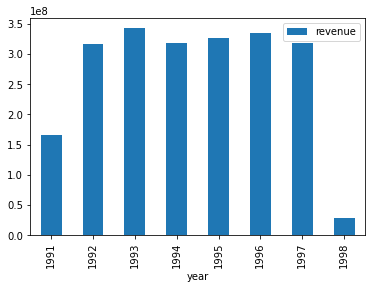

In [88]:
ax = df_year_fiscal.plot.bar(x='year')

# Star schema (Answer to Question 2)

The schema below, allows to answer the questions, regarding SQL data management. As seen above, I was able to answer the questions from section 5.

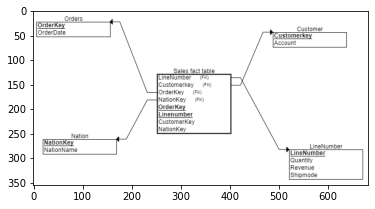

In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('starschema.png')
imgplot = plt.imshow(img)
plt.show()

# Considering Microsoft Azure, how to run this process multiple times a day (Answer to question 3)

As not a very experimented user in Azure, I would try to shedule events, in Python or in SQL to update the database by conceting the Azure or Microsoft SQL server using pyodbc.

Some documentation I found here regarding this topic:

https://github.com/mkleehammer/pyodbc/wiki


As I read, this library supported ny Microsoft allows me to run SQL queries in this database.

The randomness of the data, without the schedule of events I would propose the use of a database in pipelines to coordinate changes from the administrators. I found the next module, which is useful to create a bridge that can update new information.

https://docs.microsoft.com/en-us/learn/modules/manage-database-changes-in-azure-pipelines/

# Consideration on code deplyment and maintenance (Answer to question 4)

Control on the code and avoidance (or reparation) of human mistakes should be essential in this phase. I would propose a local maintenance version of codes made from developers and creation of controlled versions that could be stored in environments such as Visual Studio in Microsoft or Google colab.

Also, finding a platform where colleagues and developers can feel comfortable to work on should be essential, in an scenario where production should not be affected.